In [7]:
from IPython.display import Image

# Playing Atari with Deep Reinforcement Learning

# 1. Introduction

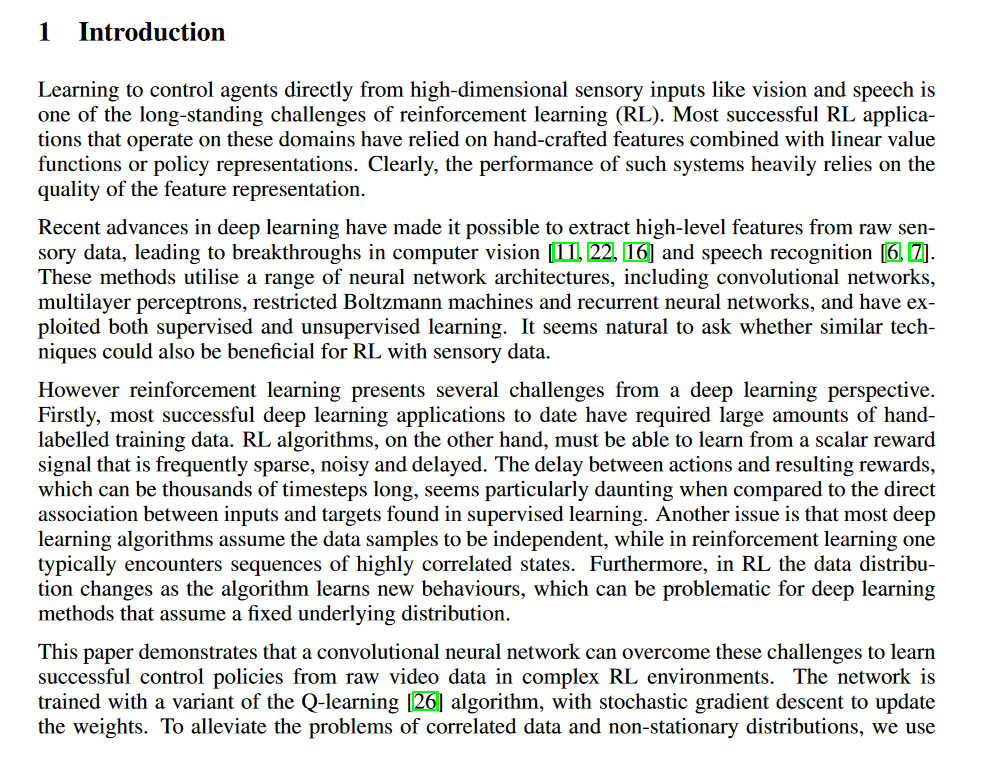

In [8]:
Image(filename = 'pic/intro_1.PNG')

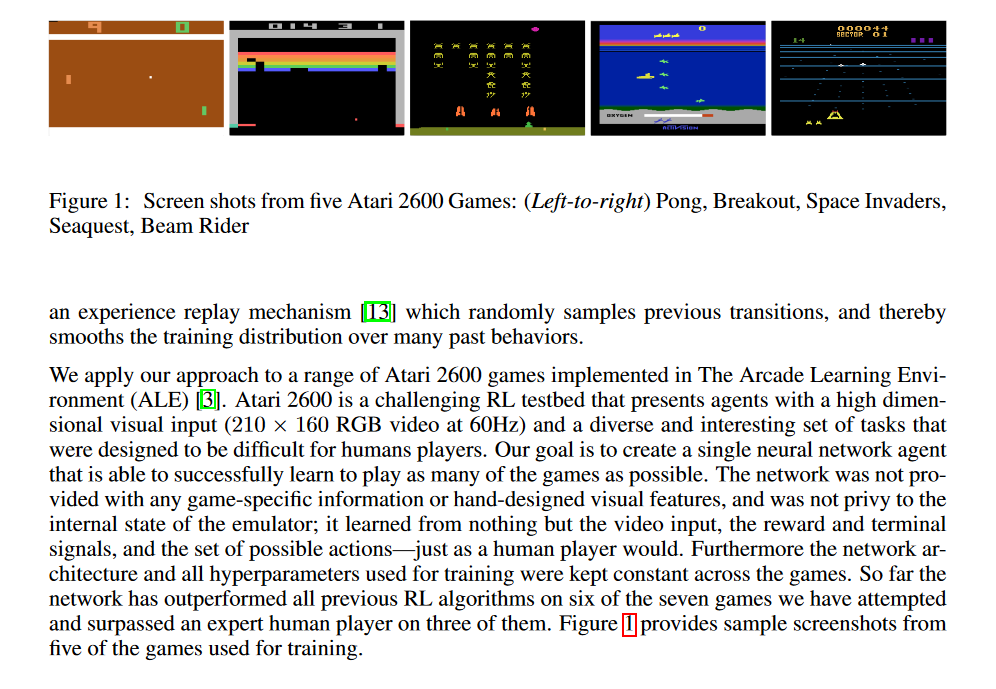

In [9]:
Image(filename = 'pic/intro_2.PNG')

## challenges of Reinforcement Learning

###  Learning control agent from high-dimensional sensory inputs(vision, speech)

### Deep learning 관점 Reinforcement learning의 한계점들

- ### Most successful deep learning applications to date have required large amounts of hand-labelled training data. 
- ### Most deep learning algorithms assume the data samples to be independen
- ### Deep learning methods that assume a fixed underlying distribution

### 문제가 되는 이유는...

- ### RL algorithms must be able to learn from a scalar reward signal that is frequently sparse, noisy and delayed
- ###  reinforcement learning one typically encounters sequences of highly correlated state
- ### data distribution changes as the algorithm learns new behaviours

## Convolutional neural network can overcome these challenges to learn successful  control  policies  from  raw  video  data  in  complex  RL  environments.

## **Goal :** Arcade Learning Environment (ALE) 에서 구현한 Atari 게임들을 인간과 마찬가지로 비디오 입력, 보상 및 터미널 신호, 가능한 동작을 학습하여 플레이하는 단일 신경망을 구성하는 것

# 2. Background

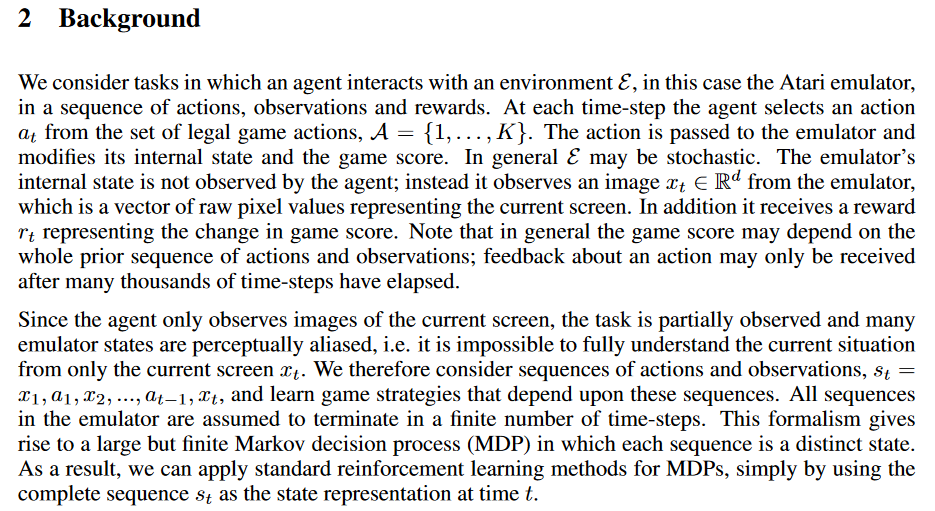

In [12]:
Image(filename = 'pic/background_mdp.PNG')

- ### Agent interacts with an environment $\epsilon$
    - ###  Atari emulator, in a sequence of actions, observations and rewards.
    - ### In each time step agent selects an action $a_t$ from set of actions $A = \{1, ... , K\}$
    

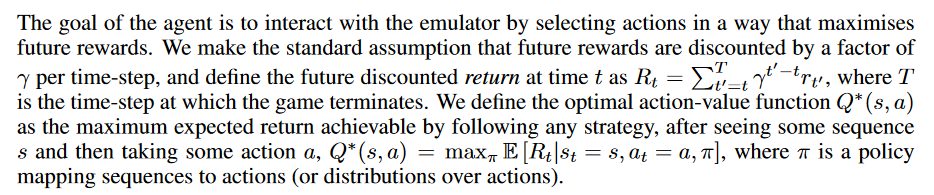

In [13]:
Image(filename = 'pic/background_2.PNG')

### agent는 emulator의 내부 프로세스를 관측하는 것이 아닌 image $ x_t \in R^d $ 를 관측한다
   - ### $x_t$ is vector of raw pixel values representing the current screen

### Reward $ r^t$ representing change in game score

### agent는 이미지만 관찰하기 때문에 emulator의 많은 상태가  perceptually aliased임

- ### $x_t$ 만으로 현재 상황을 모두 이해할 수 없기 때문에 전체 과정인 $s_t = \{x_1,a_1,x_2,...,a_{t-1},x_t\}$를 고려하며 학습해야 함

## 환경과 상태 에이전트 리워드가 모여 MDP를 구성함
 



 - ### MDP를 정의하고 MDP를 풀기 위한 일반적인 강화 학습 기법을 적용할 수 있음

- ### agent의 목표 - future rewards를 최대화하는 행동을 하는 것


- ### 감가율 $\gamma$를 적용한 reward는 $R_t = \sum^T_{t'=t}\gamma^{t'-t}r_t'$

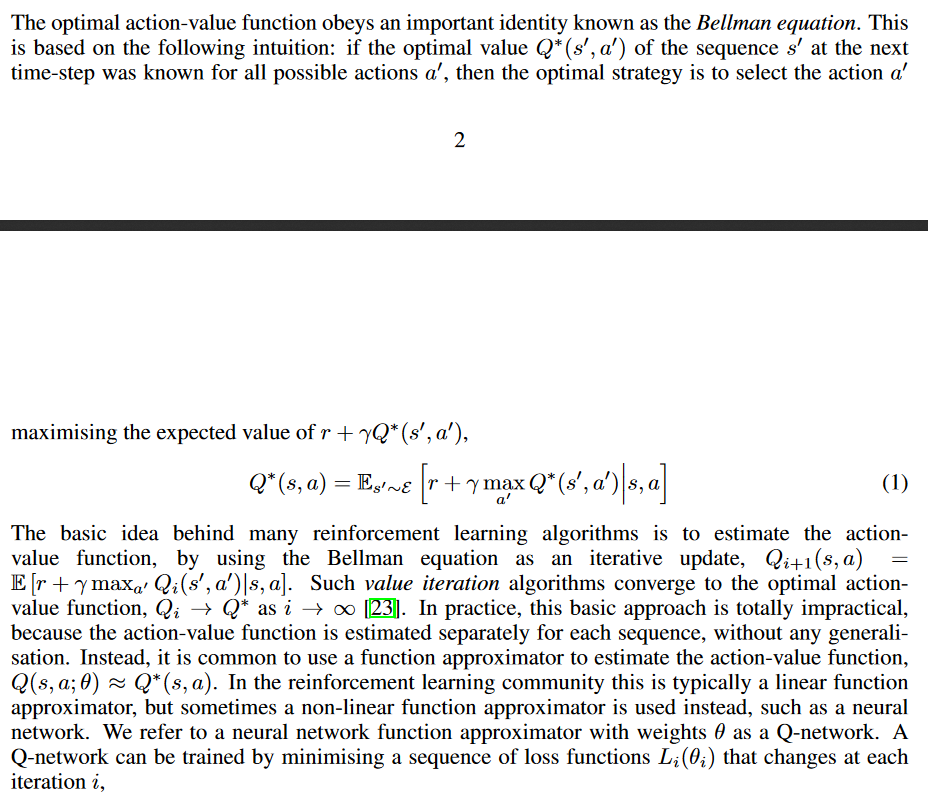

In [16]:
Image(filename = 'pic/background_3.PNG')

- ### 앞으로 받을 보상합을 최대로 해주는 큐함수에 대한 벨만 최적 방정식


$$q_*(s,a) = E\left[R_{t+1}+\gamma max_{a'}q_*(S_{t+1},a')|S_t=s, A_t=a \right]$$

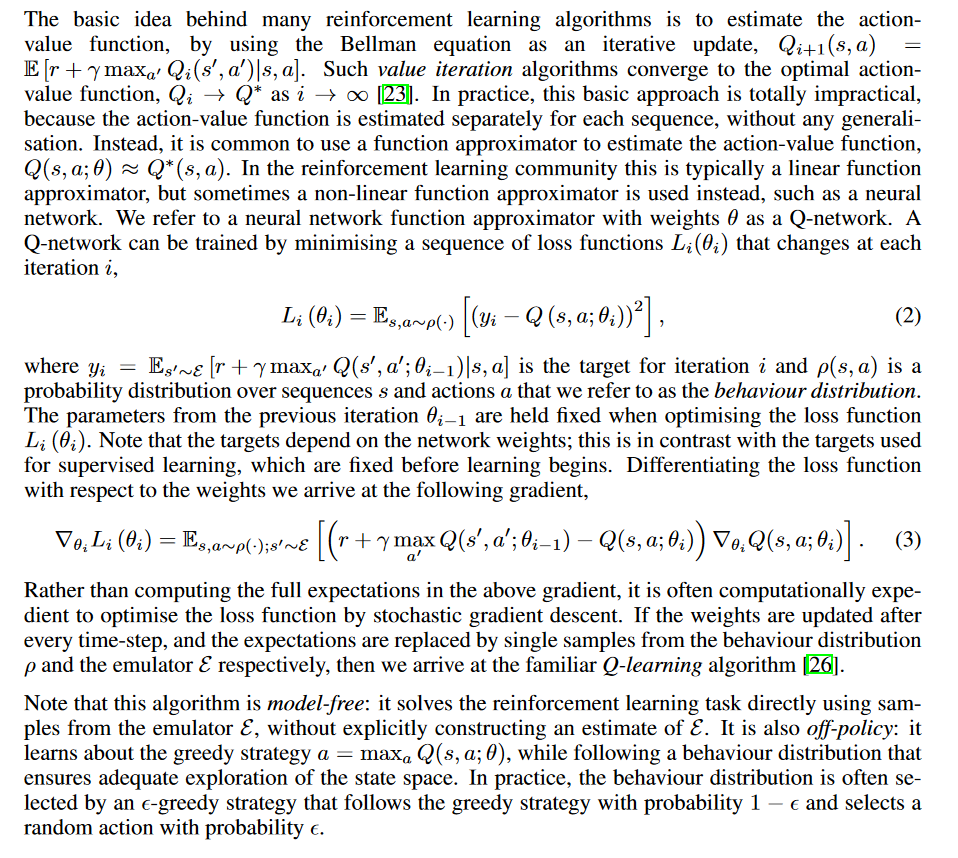

In [17]:
Image(filename = 'pic/background_4.PNG')

## Q-network에 적용할 loss함수를 정의하고 weight update를 위한 gradient 공식을 정의

## 이는 model-free 즉 환경에 대한 정보를 알고 있을 필요가 없음
## 또한 off-policy 즉 실제 환경에서 행동을 하는 정책과 업데이트를 할 때 사용하는 정책이 다름
### - 탐험과 최적 정책을 별개로 정의

# 3. Deep Reinforcement Learning 

### starting point - TD-Gammon architecture
### - on-policy 샘플 $s_t, a_t, r_t, s_{t+1}, a_{t+1}$을 통해 value를 측정하고 parameter 업데이트

### Experience replay
### - agent의 experience를 매 time-stap 마다 저장 
$ e_t= (s_t,a_t,r_t,s_t+1)$ , $D = e_1,...,e_N$

### Q-learning update 또는 minibatch update에서 샘플 $ e {\in} D$를 추출하여 사용

## Deep Q learning 의 장점


- ### 각 step에서 많은 weight update를 이용한다
- ### radomized된 샘플들은 correlation 문제를 해결하고 update의 variance를 줄인다
- ### on-policy stuck 문제를 해결한다

### 실제 실험에서 메모리 크기의 한계로 last N experience를 replay memory에 저장해 사용한다

## Preprocessing and model architecture

- ### 210 × 160 pixel images with a 128 color palette 인 원본 데이터를 gray-scale 84 X 84 image로 전처리 하여 사용

- ### 84 × 84 × 4 image produced by φ